## 3. Bonus Question

### ChatGPT search:
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
DBSCAN is density-based clustering algorithms that groups together points that are closely packed together based on two parameters: epsilon (ε) and the minimum number of points (MinPts) within ε distance. It forms clusters by identifying regions of high density separated by regions of low density, effectively handling noise and outliers.

**OPTICS (Ordering Points To Identify the Clustering Structure):**
OPTICS is an extension of DBSCAN that addresses some of its limitations, such as the sensitivity to the choice of ε. Instead of directly forming clusters, OPTICS generates a reachability plot, allowing for a more flexible identification of clusters by considering different densities at varying distances. This approach provides a more detailed view of the clustering structure in the data.

**DENCLUE (DENsity-based CLUstEring):**
DENCLUE is another density-based clustering algorithm that employs a mathematical model based on kernel density estimation. It identifies clusters by analyzing the density distribution of data points. It uses gradient ascent to find the modes of the estimated density function, forming clusters around these modes. DENCLUE can handle clusters of arbitrary shapes and sizes.

## Applying DBSCAN:

**Feature selection:**
We selected numeric features among all obtained features in the new dataset we collected in Q2. features includes:
'average_click_duration', 'average_duration_per_day', 'num_of_days', 'tot_movie_watched', 'max_time_spent_watching'

**Normalize the Data:**
Given the wide range of values across features, scaling or normalizing the data is crucial for DBSCAN, which relies on distance measures. We used StandardScaler to bring all features within a similar range.

**Handling Zero Values:**
We omited zero or empty values.

**epsilon** defines the radius within which points are considered neighbors. It influences the size of the neighborhood around each point. It is suggested to explore a range of values to adjust epsilon and min_sample around the one that provided more meaningful clusters.
we should reach a point that the number of clusters are less and each cluster has reasonable data points. 

**Min_samples** specifies the minimum number of points within the epsilon neighborhood of a point. Larger values might merge clusters, while smaller values might result in more noise points (labeled as -1) we should decrease the number of noises.

In [28]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
# Read the CSV file into a DataFrame
data = pd.read_csv("./final.csv")

In [30]:
selected_column = ['average_click_duration', 'average_duration_per_day', 'num_of_days', 'tot_movie_watched', 'max_time_spent_watching']

# Filter out rows with zero values in any selected column
filtered_data = data[(data[selected_column] != 0).any(axis=1)]

# Drop rows with missing values
filtered_data.dropna(inplace=True)

# Select relevant columns for clustering
X = filtered_data[selected_column]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled

array([[-0.28359191, -0.3088016 ,  1.63587075,  1.30840311, -0.39551334],
       [-0.22264253, -0.11432733, -0.16763182, -0.59352103, -0.21456183],
       [-0.10891105, -0.17635355, -0.29645343, -0.2131362 , -0.14624814],
       ...,
       [-0.02288249, -0.01546962,  0.73411947,  1.1182107 ,  0.14921639],
       [-0.29726974, -0.33675627, -0.42527504, -0.40332862, -0.42136168],
       [-0.29726974, -0.33675627, -0.55409666, -0.59352103, -0.42136168]])

In [32]:
def apply_DBSCAN(epsilon, min_samples):
    epsilon = epsilon  # Adjust epsilon based on scaled data
    min_samples = min_samples  # Adjust min_samples based on the dataset's density
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)
    
    # Add the cluster labels to the original DataFrame
    filtered_data['cluster_label'] = clusters
    
    # Check the clusters
    print(filtered_data['cluster_label'].value_counts())

In [33]:
def plot_clusters():
    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot for each cluster label
    for label in filtered_data['cluster_label'].unique():
        cluster_data = X_pca[filtered_data['cluster_label'] == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}')
    
    plt.title('DBSCAN Clustering')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

In [34]:
# Apply DBSCAN - epsilon: 0.1 and min_samples: 5
apply_DBSCAN(0.1, 5)

cluster_label
 3      20123
-1      10979
 6       9560
 2       4852
 5       3336
        ...  
 437        4
 321        4
 408        4
 391        4
 425        4
Name: count, Length: 440, dtype: int64


In [8]:
# Apply DBSCAN - epsilon: 0.2 and min_samples: 5

apply_DBSCAN(0.2, 5)

cluster_label
 0     77352
-1      4281
 16       39
 25       31
 12       28
       ...  
 6         4
 35        4
 71        4
 65        4
 49        3
Name: count, Length: 86, dtype: int64


In [9]:
# Apply DBSCAN - epsilon: 0.3 and min_samples: 5

apply_DBSCAN(0.3, 5)

cluster_label
 0     79760
-1      2203
 1        43
 16       41
 17       24
 12       22
 9        21
 10       20
 19       15
 18       14
 7        14
 22       12
 23       11
 2        10
 20       10
 21       10
 31        9
 4         9
 29        7
 32        7
 27        7
 3         7
 8         7
 14        7
 5         6
 13        6
 34        6
 37        6
 30        6
 24        5
 33        5
 15        5
 25        5
 36        5
 6         5
 39        5
 26        5
 28        5
 11        4
 35        4
 40        4
 38        4
Name: count, dtype: int64


In [13]:
# Apply DBSCAN - epsilon: 0.5 and min_samples: 5

apply_DBSCAN(0.5, 5)

cluster_label
 0     81330
-1       884
 2        23
 3        23
 12       10
 16        9
 10        9
 18        8
 1         7
 9         7
 4         7
 5         7
 8         6
 11        6
 7         6
 13        5
 15        5
 14        5
 6         5
 17        5
 21        5
 19        5
 20        4
Name: count, dtype: int64


In [24]:
# Apply DBSCAN - epsilon: 1 and min_samples: 5

apply_DBSCAN(1, 5)

cluster_label
 0    82073
-1      252
 1       11
 6       11
 4        9
 3        8
 2        6
 5        6
 7        5
Name: count, dtype: int64


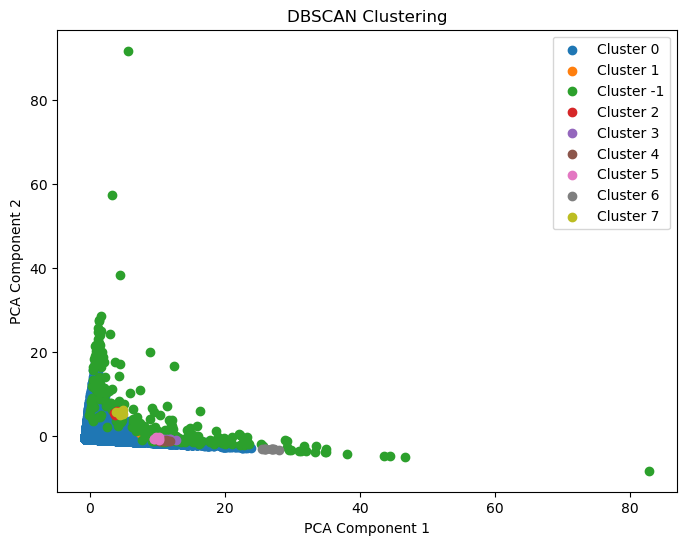

In [25]:
plot_clusters()

In [26]:
# Apply DBSCAN - epsilon: 2 and min_samples: 5

apply_DBSCAN(2, 5)

cluster_label
 0    82292
-1       89
Name: count, dtype: int64


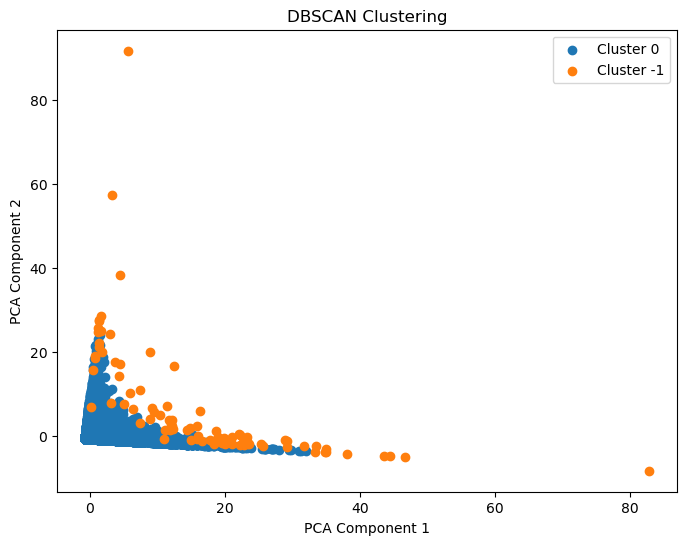

In [27]:
plot_clusters()

## Results
- As can be seen, the more we increase the **epsilon**, the fewer the number of clusters will be. the number of noises are also decreases once we gain the epsilon.
- Adjusting the **min_sample** is dependent to density of the dataset. Since based on all these 5 selected features, most of the data is close to 0 and the density around it is truly high, we can decrease the value of min_sample to even 1. However, if we do that, the number of clustrs will increase due to availability for each data point to be a cluster itself!

In [36]:
# Apply DBSCAN - epsilon: 2 and min_samples: 1
apply_DBSCAN(2, 1)

cluster_label
0     82302
9         5
4         4
24        3
7         3
12        3
29        2
26        2
14        2
52        2
54        2
5         2
23        2
44        1
40        1
39        1
41        1
42        1
38        1
43        1
37        1
49        1
45        1
46        1
47        1
48        1
35        1
50        1
51        1
53        1
55        1
56        1
57        1
58        1
36        1
30        1
34        1
33        1
2         1
3         1
6         1
8         1
10        1
11        1
13        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
25        1
27        1
28        1
1         1
31        1
32        1
59        1
Name: count, dtype: int64


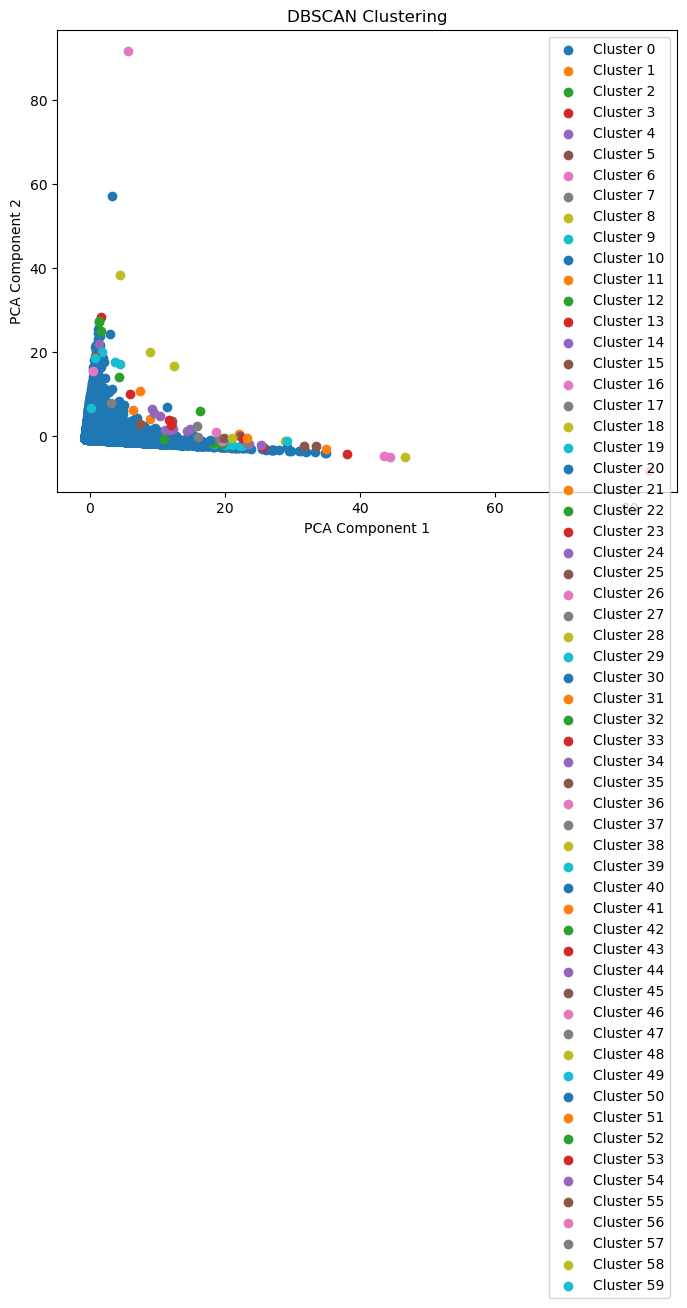

In [37]:
plot_clusters()